In [60]:
import aesara
import psycopg2
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import pymc as pm
%matplotlib inline

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [33]:
pg_connection = psycopg2.connect(
    dbname="postgres",
    user="apparao",
    password="!bern@HARD23",
    host="thedb.postgres.database.azure.com",
    port="5432"
)

pg_cursor = pg_connection.cursor()

In [45]:
query = 'select * from pres_election_mdl.fct_election_model_bayes'

In [46]:
pg_cursor.execute(query)
rows = pg_cursor.fetchall()
data_model_columns = [col[0] for col  in pg_cursor.description]

In [47]:
data_model_df = pd.DataFrame(rows, columns=data_model_columns)

In [48]:
data_model_df_dem = data_model_df.loc[data_model_df.party == 'DEMOCRAT']
data_model_df_gop = data_model_df.loc[data_model_df.party == 'REPUBLICAN']

In [49]:
data_model_df_dem_2012 = data_model_df_dem.loc[data_model_df_dem.year == 2012]

In [51]:
mdl_vars = ['vote_share_prior_election','avg_vote_share_state_party_prior_election'	,'avg_vote_share_national_party_prior_election']
y = ['vote_share']

<Axes: >

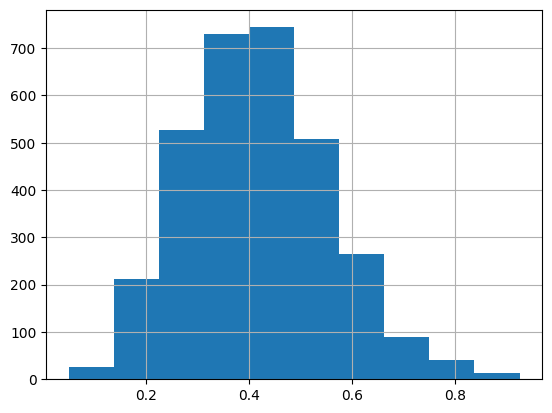

In [52]:
data_model_df_dem_2012.vote_share_prior_election.hist()

In [53]:
data_model_df_dem_2012.vote_share_prior_election.mean()

0.4152397396550832

In [54]:
data_model_df_dem_2012.vote_share_prior_election.std()

0.13851673676522777

In [55]:
data_model_df_dem_2012

,year,state,county_name,fips_short,party,vote_share,vote_share_prior_election,avg_vote_share_state_party_prior_election,avg_vote_share_national_party_prior_election
0,2012,ALABAMA,AUTAUGA,01001,DEMOCRAT,0.265878,0.257730,0.382693,0.41524
2,2012,ALABAMA,BALDWIN,01003,DEMOCRAT,0.215894,0.238119,0.382693,0.41524
4,2012,ALABAMA,BARBOUR,01005,DEMOCRAT,0.513685,0.489854,0.382693,0.41524
6,2012,ALABAMA,BIBB,01007,DEMOCRAT,0.261520,0.265965,0.382693,0.41524
8,2012,ALABAMA,BLOUNT,01009,DEMOCRAT,0.123719,0.145135,0.382693,0.41524
...,...,...,...,...,...,...,...,...,...
6296,2012,WYOMING,SWEETWATER,56037,DEMOCRAT,0.282569,0.342304,0.284144,0.41524
6298,2012,WYOMING,TETON,56039,DEMOCRAT,0.541957,0.604580,0.284144,0.41524
6300,2012,WYOMING,UINTA,56041,DEMOCRAT,0.190655,0.275244,0.284144,0.41524
6302,2012,WYOMING,WASHAKIE,56043,DEMOCRAT,0.201318,0.254146,0.284144,0.41524
